In [2]:
update.packages("lavaan")

In [3]:
library("lavaan")

Warning message:
"package 'lavaan' was built under R version 3.6.3"
This is lavaan 0.6-5

lavaan is BETA software! Please report any bugs.



In [4]:
data.SEM = read.delim("sem.txt")
head(data.SEM)
names(data.SEM)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6,6,6,5,6,6,6,6,5,6,6,5,4,5,6,5,5
2,7,6,6,6,4,4,4,5,4,5,6,5,6,4,6,5,5
3,4,6,5,5,5,5,5,4,5,6,3,4,4,4,3,5,4
4,6,5,5,6,4,4,4,4,4,5,5,3,3,4,6,4,4
5,3,5,4,5,5,3,3,3,2,3,2,4,5,2,5,2,3
6,6,6,6,6,5,5,5,6,6,6,6,5,7,6,6,7,5


[1] "x1"  "x2"  "x3"  "x4"  "x5"  "x6"  "x7"  "x8"  "x9"  "x10" "x11" "x12"
[13] "x13" "x14" "x15" "x16" "x17"

In [12]:
#Memformulasikan model konseptual 
model.SEM <- '#Mendeskripsikan model pengukuran (measurement model)
kualitas_layanan =~ x1 + x2 + x3 + x4
penanganan_komplain =~ x5 + x6 + x7 
citra =~ x8 + x9 + x10
kepuasan_nasabah =~ x11 + x12 + x13
loyalitas_nasabah =~ x14 + x15 + x16 + x17
#Mendeskripsikan hubungan antar variabel laten (model struktural)
kepuasan_nasabah ~ kualitas_layanan + penanganan_komplain
loyalitas_nasabah ~ kepuasan_nasabah + citra
'

In [24]:
#Mendapatkan Estimasi Parameter
semfit <- sem(model.SEM,data=data.SEM)
summary(semfit,standardized=TRUE, fit.measures=TRUE, rsq=TRUE, modindices=TRUE)

lavaan 0.6-5 ended normally after 49 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         41
                                                      
  Number of observations                           119
                                                      
Model Test User Model:
                                                      
  Test statistic                               137.849
  Degrees of freedom                               112
  P-value (Chi-square)                           0.049

Model Test Baseline Model:

  Test statistic                              2341.523
  Degrees of freedom                               136
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.988
  Tucker-Lewis Index (TLI)                       0.986

Loglikelihood and Information Criteri

In [ ]:
# Degrees of freedom sebesar 112 --> model over identified (153 - 41)
# Pada model pengukuran diketahui semua nilai loading faktor valid dan signifikan
# Diketahui nilai R-square bahwa masing-masing varibel laten yang direpresentasikan oleh indikatornya memiliki R-Square cukup besar

In [7]:
#reliabilitas
update.packages("semTools")
library("semTools")

 

###############################################################################

This is semTools 0.5-2

All users of R (or SEM) are invited to submit functions or ideas for functions.

###############################################################################



In [25]:
reliability(semfit)
# hasil dibawah menunjukan reliabilitas semua variabel laten adalah reliabel

,kualitas_layanan,penanganan_komplain,citra,kepuasan_nasabah,loyalitas_nasabah,total
alpha,0.9239878,0.9249616,0.9183225,0.9023174,0.9249300,0.9760303
omega,0.9252830,0.9240619,0.9186860,0.9034165,0.9252021,0.9812232
omega2,0.9252830,0.9240619,0.9186860,0.9034165,0.9252021,0.9812232
omega3,0.9277635,0.9223326,0.9184767,0.9036698,0.9194781,0.9739899
avevar,0.7559770,0.8022846,0.7903596,0.7575371,0.7560137,0.7706995


Persamaan model struktural : diketahui semua variabel laten berpengaruh secara signifikan terhadap kepuasan nasabah dan loyalitas nasabah

kepuasan_nasabah = 0,531 kualitas_layanan + 0,457 penanganan_komplain (R-Square = 0.922)

loyalitas_nasabah = 0,641 kepuasan_nasabah + 0,322 citra ((R-Square = 0.876)

Selanjutnya berikan interpretasi overall goodness of fit (CFI, GFI, TLI dll)  

Registered S3 methods overwritten by 'huge':
  method    from   
  plot.sim  BDgraph
  print.sim BDgraph



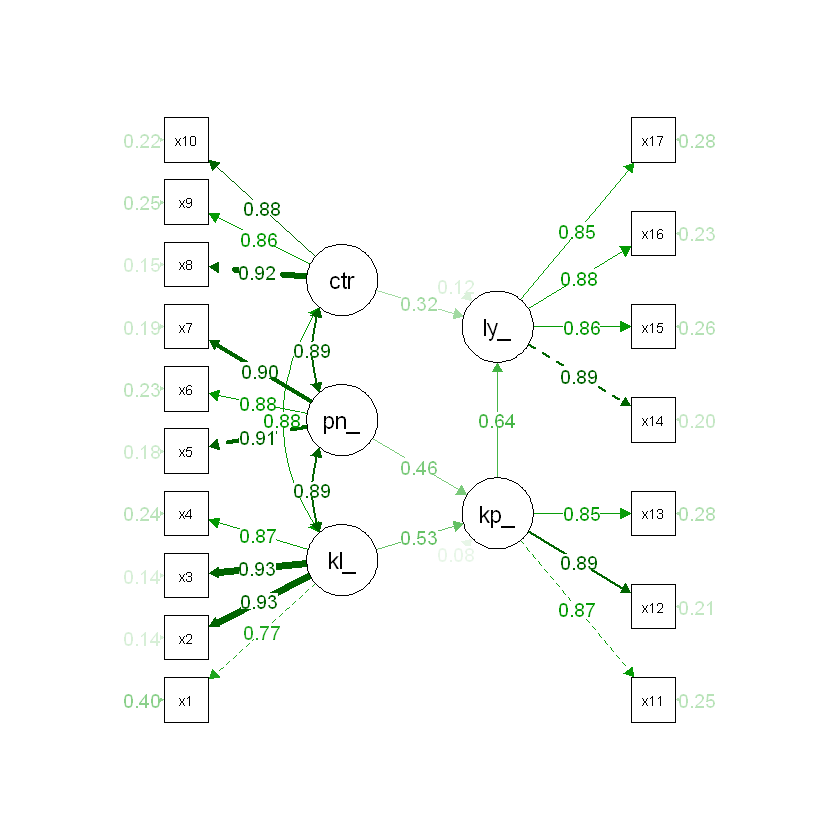

In [9]:
library(semPlot)
semPaths(semfit,whatLabels="est.std",style="lisrel",residuals=TRUE, edge.label.cex=1, layout = "tree", rotation = 2, what = "std")

In [10]:
install.packages("MVN", dependencies = TRUE)

Installing package into 'C:/Users/Anuraga/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MVN' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Anuraga\AppData\Local\Temp\Rtmps7vOTU\downloaded_packages


Warning message:
"package 'MVN' was built under R version 3.6.3"
Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

sROC 0.1-2 loaded



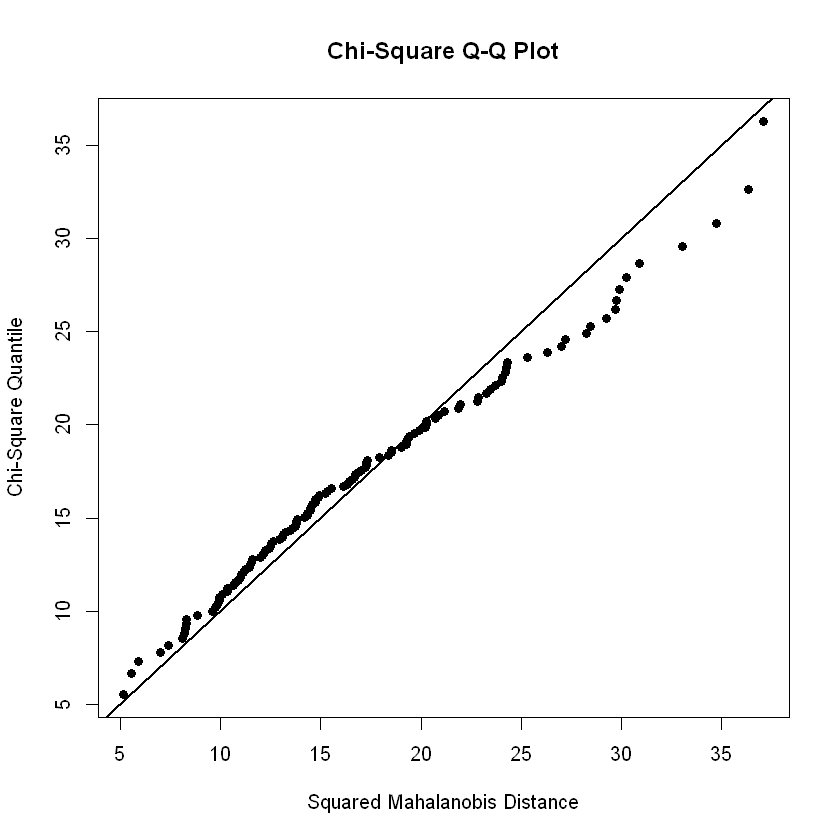

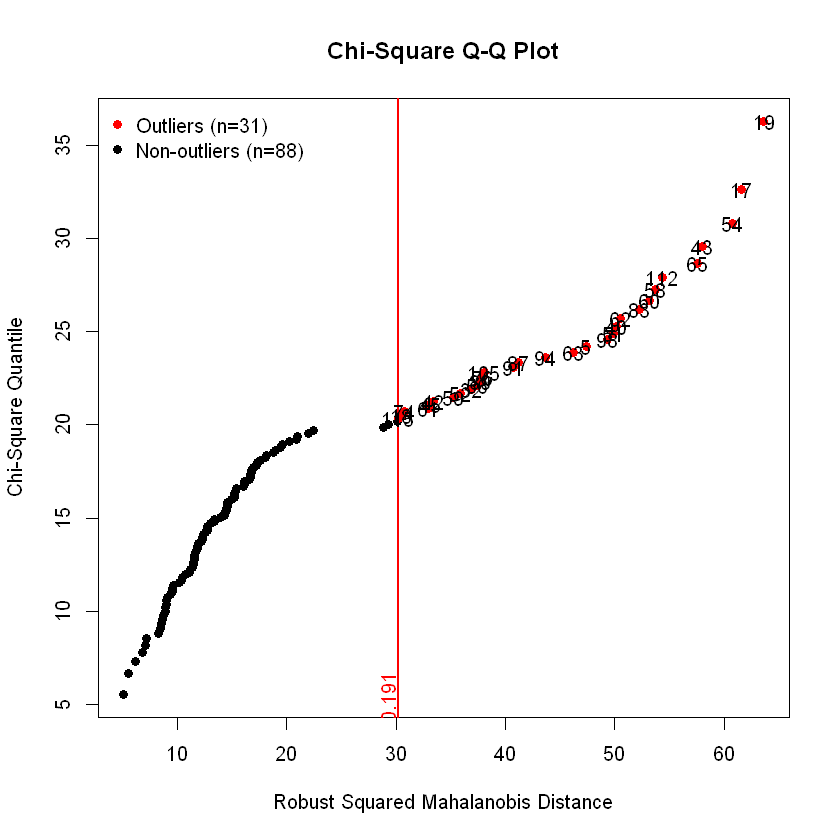

In [11]:
#normal multivariate
library("MVN")
data.SEM <- data.frame(data.SEM)
normalmulti <- mvn(data.SEM, mvnTest = "mardia",cov = TRUE, multivariatePlot = "qq",multivariateOutlierMethod = "quan",
showOutliers = TRUE, showNewData = TRUE)

In [18]:
# data tidak berdistribusi normal multivariat
# data baru yang digunakan 
data.SEM1 = normalmulti$newData
head(data.SEM1)
# Pada kasus ini kita asumsikan data memenuhi asumsi normal multivariat

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6,6,6,5,6,6,6,6,5,6,6,5,4,5,6,5,5
10,3,3,3,3,2,2,2,2,3,2,3,3,2,2,3,2,2
100,5,6,6,6,6,6,6,4,3,4,5,5,5,6,5,7,6
101,5,5,5,5,5,5,5,5,4,5,5,5,6,3,5,4,4
102,5,5,5,5,6,6,6,5,4,5,6,4,5,5,4,6,5
103,3,3,3,3,3,3,3,2,1,2,3,2,2,2,2,1,3


### Modifikasi Model
Menurut Joreskog (1993, dalam Brown 2006, hal.123) merekomendasikan bahwa model yang dimodifikasi dimulai dengan bebas mengestimasi parameter tertentu atau parameter konstrain yang memiliki nilai modification index paling tinggi. Jika pada kenyataannya tidak ada parameter yang memiliki modification index tertinggi, maka pertimbangkanlah untuk memilih parameter yang memiliki modification index terbesar kedua. Modifikasi indeks digunakan untuk meningkatkan ukuran kebaikan suatu model / goodness of fit, akan tetapi pada saat dilakukan modifikasi disarankan memperhatikan konseptual teori yang membentuk pengaruh antar dalam variabel laten.

Pada kasus diatas nilai indeks modifikasi terbesar adalah X5 dengan X7 sebesar 9.345, maka dalam konseptual model selanjutnya kita akan korelasikan error indikator tersebut.

lavaan 0.6-5 ended normally after 52 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         42
                                                      
  Number of observations                           119
                                                      
Model Test User Model:
                                                      
  Test statistic                               127.937
  Degrees of freedom                               111
  P-value (Chi-square)                           0.130

Model Test Baseline Model:

  Test statistic                              2341.523
  Degrees of freedom                               136
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.992
  Tucker-Lewis Index (TLI)                       0.991

Loglikelihood and Information Criteri

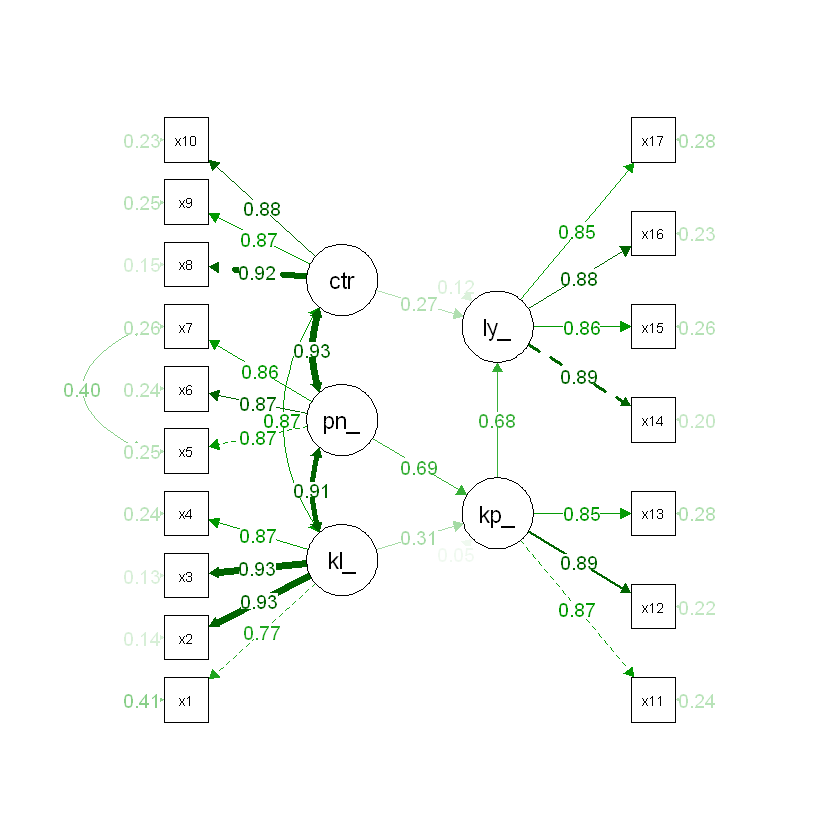

In [26]:
#Memformulasikan model konseptual 
Mod.SEM <- '#Mendeskripsikan model pengukuran (measurement model)
kualitas_layanan =~ x1 + x2 + x3 + x4
penanganan_komplain =~ x5 + x6 + x7 
citra =~ x8 + x9 + x10
kepuasan_nasabah =~ x11 + x12 + x13
loyalitas_nasabah =~ x14 + x15 + x16 + x17
#Mendeskripsikan hubungan antar variabel laten (model struktural)
kepuasan_nasabah ~ kualitas_layanan + penanganan_komplain
loyalitas_nasabah ~ kepuasan_nasabah + citra
x5~~x7'
#Mendapatkan Estimasi Parameter
mod.sem <- sem(Mod.SEM,data=data.SEM)
summary(mod.sem,standardized=TRUE, fit.measures=TRUE, rsq=TRUE, modindices=TRUE)

In [21]:
fitMeasures(semfit, c("chisq", "df", "pvalue", "cfi", "rmsea", "tli", "gfi"))

chisq      df  pvalue     cfi   rmsea     tli     gfi 
137.849 112.000   0.049   0.988   0.044   0.986   0.884

In [22]:
fitMeasures(mod.sem, c("chisq", "df", "pvalue", "cfi", "rmsea", "tli", "gfi"))

chisq      df  pvalue     cfi   rmsea     tli     gfi 
127.937 111.000   0.130   0.992   0.036   0.991   0.895

In [27]:
# diatas adalah implikasi dari modifikasi model dalam SEM berbasis Covariance, Goodness of Fit Model menjadi naik

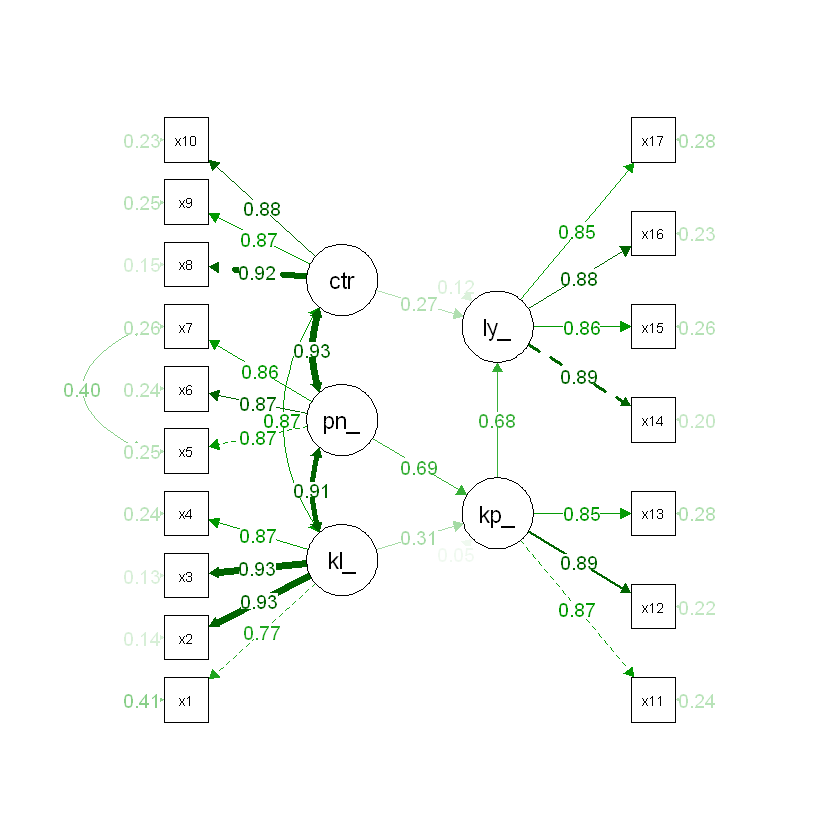

In [28]:
library(semPlot)
semPaths(mod.sem,whatLabels="est.std",style="lisrel",residuals=TRUE, edge.label.cex=1, layout = "tree", rotation = 2, what = "std")